# 데이터 불러오기



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 명목 자료 변환

## 성별 처리

In [14]:
# 남은 0, 여는 1
df=df.replace({'male':0,'female':1})

##  get_dummies

In [15]:
pd.get_dummies(df.Embarked).tail()

,C,Q,S
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0
890,0,1,0


# 순서형 자료 변환

- 수치에 맵칭하여 변환하지만, 수치 간 크기 차이는 커스텀 가능
- 크기 차이가 머신러닝 결과에 영향을 끼칠 수 있음

# 수치형 자료 변환

- 정규화vs 표준화 vs 범주화(범주가 중요한 경우 사용)

## 정규화

In [16]:
def normal(data):
  data=(data-data.min())/(data.max()-data.min())
  return data

df.Fare.head(3)

0     7.2500
1    71.2833
2     7.9250
Name: Fare, dtype: float64

In [17]:
df['Fare_normal']=normal(df.Fare)
df['Fare_normal'].head(3)

0    0.014151
1    0.139136
2    0.015469
Name: Fare_normal, dtype: float64

## 표준화

In [18]:
def standard(data):
    data = (data - data.mean())/data.std()
    return data

df['Fare_standard']=standard(df.Fare)
df['Fare_standard'].head(2)

0   -0.502163
1    0.786404
Name: Fare_standard, dtype: float64

## 범주화

- 변수의 값보다 범주가 중요한 경우 사용


# 데이터 정제 및 분리

## 결측값 처리

### **방식**

1. 샘플 삭제
2. 변수 삭제
3. 다른 값으로 대체

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    int64  
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Fare_normal    891 non-null    float64
 13  Fare_standard  891 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 97.6+ KB


### 변수 삭제: 케빈 변수 제거


In [20]:
df=df.drop(columns=['Cabin'])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_normal,Fare_standard
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.014151,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.139136,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469,-0.488580


### 샘플 제거

In [21]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    712 non-null    int64  
 1   Survived       712 non-null    int64  
 2   Pclass         712 non-null    int64  
 3   Name           712 non-null    object 
 4   Sex            712 non-null    int64  
 5   Age            712 non-null    float64
 6   SibSp          712 non-null    int64  
 7   Parch          712 non-null    int64  
 8   Ticket         712 non-null    object 
 9   Fare           712 non-null    float64
 10  Embarked       712 non-null    object 
 11  Fare_normal    712 non-null    float64
 12  Fare_standard  712 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 77.9+ KB


### 대체

## 이상치 처리

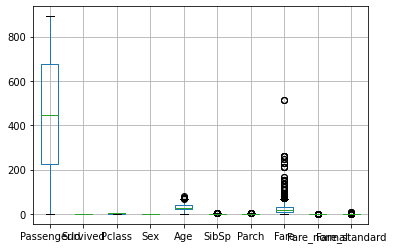

In [29]:
df.boxplot()

In [30]:
#나이가 이상한 값
titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])>0]

outlier=titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])>0]['Age']
outlier

57     28.50
78      0.83
111    14.50
116    70.50
122    32.50
123    32.50
148    36.50
152    55.50
153    40.50
203    45.50
227    20.50
296    23.50
305     0.92
331    45.50
469     0.75
525    40.50
644     0.75
676    24.50
735    28.50
755     0.67
767    30.50
803     0.42
814    30.50
831     0.83
843    34.50
Name: Age, dtype: float64

In [31]:
titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])==0]#(정상치)

len(outlier)

25

In [33]:
df_final=titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])==0]#(정상치)

df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_normal,Fare_standard
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.014151,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.139136,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0.103644,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0.015713,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,Q,0.056848,-0.061964
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,0.025374,-0.386454
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,0.058556,-0.044356
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,0.058556,-0.044356


# 참고

In [34]:
from sklearn.model_selection import train_test_split

#1. feature data, label data(지도학습)

X = df_final.drop(columns=['Survived'])
y = df_final['Survived']

print('X의 데이터 개수:%d'%(len(X)))
print('y의 데이터 개수:%d'%(len(y)))

X의 데이터 개수:687
y의 데이터 개수:687


In [35]:
#2. train data, test data로 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#random_state=42숫자를 각각 적용해보고 나은거 선택

print('학습한 데이터 개수:%d'%(len(X_train)))
print('테스타 하기 위해 남겨둔 데이터 개수:%d'%(len(X_test)))

학습한 데이터 개수:480
테스타 하기 위해 남겨둔 데이터 개수:207
